# Scrapping Amazon Reviews

In [1]:
#importing packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#using requests which alows us to send HTTP requests using Python
def get_soup(url):
    url = url
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

In [3]:
reviewlist = []
#fetching only data which is necessary like rating title and content given by the customers
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'content': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [4]:
#creating a loop from 1 to 100 reviews pages of the product
for x in range(1,100):
    soup = get_soup(f'https://www.amazon.in/Rockerz-370-Headphone-Bluetooth-Lightweight/product-reviews/B0856HNMR7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break
print('Done')

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
30
Getting page: 5
40
Getting page: 6
50
Getting page: 7
60
Getting page: 8
60
Getting page: 9
70
Getting page: 10
80
Getting page: 11
90
Getting page: 12
100
Getting page: 13
110
Getting page: 14
120
Getting page: 15
120
Getting page: 16
130
Getting page: 17
140
Getting page: 18
150
Getting page: 19
160
Getting page: 20
170
Getting page: 21
180
Getting page: 22
180
Getting page: 23
180
Getting page: 24
180
Getting page: 25
190
Getting page: 26
200
Getting page: 27
210
Getting page: 28
220
Getting page: 29
230
Getting page: 30
240
Getting page: 31
250
Getting page: 32
250
Getting page: 33
260
Getting page: 34
270
Getting page: 35
280
Getting page: 36
290
Getting page: 37
300
Getting page: 38
310
Getting page: 39
310
Getting page: 40
320
Getting page: 41
330
Getting page: 42
340
Getting page: 43
340
Getting page: 44
340
Getting page: 45
350
Getting page: 46
360
Getting page: 47
370
Getting page: 48
370
Getting page

In [5]:
#creating dataframe of the list 
df = pd.DataFrame(reviewlist)
df

title  rating  \
0    Best quality & value for money     4.0   
1               Great sound quality     4.0   
2      Good one at this price range     4.0   
3                              Atif     4.0   
4                   Value for money     4.0   
..                              ...     ...   
625                    Worth buying     5.0   
626                       Very good     4.0   
627                   Nice product👍     4.0   
628               Wonderful product     5.0   
629           Built quality is poor     2.0   

                                               content  
0    Sound quality is superb noise cancellation is ...  
1    Overall its great the only thing thats poor is...  
2                                  Good battery backup  
3                                                 Good  
4    It's a very Good headphone compared to it's pr...  
..                                                 ...  
625  The sound quality is AMAZING and is suitable f...  
626                                          Very good  
627                                                     
628                     Battery backups are sooo goood  
629  It's ear cushion got damaged within 2 months. ...  

[630 rows x 3 columns]

In [6]:
df.shape

(630, 3)

In [7]:
df['content'].unique

<bound method Series.unique of 0      Sound quality is superb noise cancellation is ...
1      Overall its great the only thing thats poor is...
2                                    Good battery backup
3                                                   Good
4      It's a very Good headphone compared to it's pr...
                             ...                        
625    The sound quality is AMAZING and is suitable f...
626                                            Very good
627                                                     
628                       Battery backups are sooo goood
629    It's ear cushion got damaged within 2 months. ...
Name: content, Length: 630, dtype: object>

In [8]:
#combining two columns title and content to make a new column called reviews 
df["reviews"] = df["title"]+df["content"]
df.head()

title  rating  \
0  Best quality & value for money     4.0   
1             Great sound quality     4.0   
2    Good one at this price range     4.0   
3                            Atif     4.0   
4                 Value for money     4.0   

                                             content  \
0  Sound quality is superb noise cancellation is ...   
1  Overall its great the only thing thats poor is...   
2                                Good battery backup   
3                                               Good   
4  It's a very Good headphone compared to it's pr...   

                                             reviews  
0  Best quality & value for moneySound quality is...  
1  Great sound qualityOverall its great the only ...  
2    Good one at this price rangeGood battery backup  
3                                           AtifGood  
4  Value for moneyIt's a very Good headphone comp...

In [9]:
#instead of droping the columns we can access the columns we need in further process by iloc 
amazon = df.iloc[:,[1,3]]
amazon

rating                                            reviews
0       4.0  Best quality & value for moneySound quality is...
1       4.0  Great sound qualityOverall its great the only ...
2       4.0    Good one at this price rangeGood battery backup
3       4.0                                           AtifGood
4       4.0  Value for moneyIt's a very Good headphone comp...
..      ...                                                ...
625     5.0  Worth buyingThe sound quality is AMAZING and i...
626     4.0                                 Very goodVery good
627     4.0                                      Nice product👍
628     5.0    Wonderful productBattery backups are sooo goood
629     2.0  Built quality is poorIt's ear cushion got dama...

[630 rows x 2 columns]

In [10]:
#now we have more information in less columns 

# Data Preprocessing

Data preprocessing is the process of transforming raw data into an understandable format. 

It is also an important step in data mining as we cannot work with raw data. 

The quality of the data should be checked before applying machine learning or data mining algorithms

In [11]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   630 non-null    float64
 1   reviews  630 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.0+ KB


In [12]:
#checking null values  
amazon.isnull().sum()

rating     0
reviews    0
dtype: int64

In [13]:
amazon.describe()

rating
count  630.000000
mean     3.895238
std      1.006407
min      1.000000
25%      3.000000
50%      4.000000
75%      5.000000
max      5.000000

In [14]:
#counts of every rating 
amazon['rating'].value_counts()

4.0    292
5.0    178
3.0    103
2.0     30
1.0     27
Name: rating, dtype: int64

In [15]:
# df_value_counts =pd.DataFrame()
# lst = amazon['rating'].unique()  
# dframe = pd.DataFrame(lst)  
# nd= amazon['rating'].value_counts()
# dframes= pd.DataFrame(nd)
ratings_count = {'Rating count': amazon['rating'].value_counts()}  
rating_count= pd.DataFrame(ratings_count)
rating_count

Rating count
4.0           292
5.0           178
3.0           103
2.0            30
1.0            27

# Visualizations for Ratings

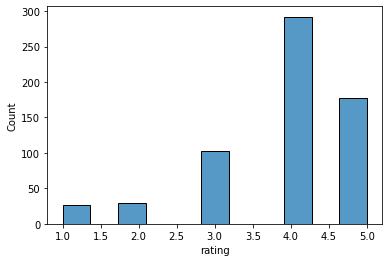

In [16]:
sns.histplot(amazon['rating'])
plt.show()

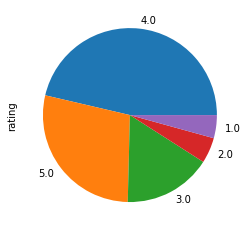

In [17]:
amazon.rating.value_counts().plot(kind='pie')
plt.show()

# Text Preprocessing

In [18]:
#to analyze the data we are a replicating the dataframe as amazon to store more columns but it won't distrub the main dataset
amazon_analysis = amazon.copy()

In [19]:
#Number of characters in single tweet
amazon_analysis['char_count'] = amazon_analysis['reviews'].str.len() ## this also includes spaces
amazon_analysis[['reviews','char_count']]

reviews  char_count
0    Best quality & value for moneySound quality is...         128
1    Great sound qualityOverall its great the only ...         115
2      Good one at this price rangeGood battery backup          47
3                                             AtifGood           8
4    Value for moneyIt's a very Good headphone comp...         209
..                                                 ...         ...
625  Worth buyingThe sound quality is AMAZING and i...         150
626                                 Very goodVery good          18
627                                      Nice product👍          13
628    Wonderful productBattery backups are sooo goood          47
629  Built quality is poorIt's ear cushion got dama...          79

[630 rows x 2 columns]

In [20]:
#count of special charaters in the text  
amazon_analysis['punctuations'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('[!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]')]))
amazon_analysis[['reviews','punctuations']]

reviews  punctuations
0    Best quality & value for moneySound quality is...             0
1    Great sound qualityOverall its great the only ...             0
2      Good one at this price rangeGood battery backup             0
3                                             AtifGood             0
4    Value for moneyIt's a very Good headphone comp...             0
..                                                 ...           ...
625  Worth buyingThe sound quality is AMAZING and i...             0
626                                 Very goodVery good             0
627                                      Nice product👍             0
628    Wonderful productBattery backups are sooo goood             0
629  Built quality is poorIt's ear cushion got dama...             0

[630 rows x 2 columns]

In [21]:
#number of numericals present in each row
amazon_analysis['numerics'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
amazon_analysis[['reviews','numerics']]

reviews  numerics
0    Best quality & value for moneySound quality is...         0
1    Great sound qualityOverall its great the only ...         0
2      Good one at this price rangeGood battery backup         0
3                                             AtifGood         0
4    Value for moneyIt's a very Good headphone comp...         0
..                                                 ...       ...
625  Worth buyingThe sound quality is AMAZING and i...         0
626                                 Very goodVery good         0
627                                      Nice product👍         0
628    Wonderful productBattery backups are sooo goood         0
629  Built quality is poorIt's ear cushion got dama...         1

[630 rows x 2 columns]

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

In [24]:
#number of stopwords in each tweet
stop = stopwords.words('english')

amazon_analysis['stopwords'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
amazon_analysis[['reviews','stopwords']]

reviews  stopwords
0    Best quality & value for moneySound quality is...          4
1    Great sound qualityOverall its great the only ...          9
2      Good one at this price rangeGood battery backup          2
3                                             AtifGood          0
4    Value for moneyIt's a very Good headphone comp...         14
..                                                 ...        ...
625  Worth buyingThe sound quality is AMAZING and i...          8
626                                 Very goodVery good          0
627                                      Nice product👍          0
628    Wonderful productBattery backups are sooo goood          1
629  Built quality is poorIt's ear cushion got dama...          1

[630 rows x 2 columns]

### Removing Stopwords

In [25]:
#removing all the stopwords in the column 
stop = stopwords.words('english')
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
amazon['reviews']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12664\1886737687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0      Best quality & value moneySound quality superb...
1      Great sound qualityOverall great thing thats p...
2                Good one price rangeGood battery backup
3                                               AtifGood
4      Value moneyIt's Good headphone compared price....
                             ...                        
625    Worth buyingThe sound quality AMAZING suitable...
626                                   Very goodVery good
627                                        Nice product👍
628          Wonderful productBattery backups sooo goood
629    Built quality poorIt's ear cushion got damaged...
Name: reviews, Length: 630, dtype: object

In [26]:
amazon['reviews'].isnull().sum()

0

In [27]:
#converting all the upper case and sentence case in lower case 
amazon = amazon.apply(lambda x: x.astype(str).str.lower())

In [28]:
#converted in lower case
amazon.head()

rating                                            reviews
0    4.0  best quality & value moneysound quality superb...
1    4.0  great sound qualityoverall great thing thats p...
2    4.0            good one price rangegood battery backup
3    4.0                                           atifgood
4    4.0  value moneyit's good headphone compared price....

In [29]:
#rare words counts
freq = pd.Series(' '.join(amazon['reviews']).split()).value_counts()[-10:]
freq

pitch          1
balance        1
claim.like-    1
invoice        1
register       1
company's      1
goto           1
1k             1
1.5k           1
poorit's       1
dtype: int64

In [30]:
#rare words removal
freq = list(freq.index)
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
amazon['reviews'].head()

0    best quality & value moneysound quality superb...
1    great sound qualityoverall great thing thats p...
2              good one price rangegood battery backup
3                                             atifgood
4    value moneyit's good headphone compared price....
Name: reviews, dtype: object

In [31]:
amazon

rating                                            reviews
0      4.0  best quality & value moneysound quality superb...
1      4.0  great sound qualityoverall great thing thats p...
2      4.0            good one price rangegood battery backup
3      4.0                                           atifgood
4      4.0  value moneyit's good headphone compared price....
..     ...                                                ...
625    5.0  worth buyingthe sound quality amazing suitable...
626    4.0                                 very goodvery good
627    4.0                                      nice product👍
628    5.0        wonderful productbattery backups sooo goood
629    2.0  built quality ear cushion got damaged within 2...

[630 rows x 2 columns]

In [32]:
amazon['reviews'].isnull().sum()

0

In [33]:
import re

In [34]:
#removing all the emojis present in the text 
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
amazon['reviews'] = amazon['reviews'].apply(lambda x: remove_emoji(x))


In [35]:
amazon['reviews'] 

0      best quality & value moneysound quality superb...
1      great sound qualityoverall great thing thats p...
2                good one price rangegood battery backup
3                                               atifgood
4      value moneyit's good headphone compared price....
                             ...                        
625    worth buyingthe sound quality amazing suitable...
626                                   very goodvery good
627                                         nice product
628          wonderful productbattery backups sooo goood
629    built quality ear cushion got damaged within 2...
Name: reviews, Length: 630, dtype: object

In [36]:
# from textblob import TextBlob

In [37]:
# #spelling corrections 
# amazon['reviews'] = amazon['reviews'][:5].apply(lambda x: str(TextBlob(x).correct()))
# amazon['reviews'] 

In [38]:
amazon['reviews'].isnull().sum()

0

### Stemming 

In [39]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
amazon['reviews'] [:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    best qualiti & valu moneysound qualiti superb ...
1    great sound qualityoveral great thing that poo...
2              good one price rangegood batteri backup
3                                             atifgood
4    valu moneyit' good headphon compar price. prev...
Name: reviews, dtype: object

In [40]:
from textblob import Word
from textblob import TextBlob

### Lemmatization

In [41]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
amazon['reviews']  = amazon['reviews'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
amazon['reviews'] .head()

0    best quality & value moneysound quality superb...
1    great sound qualityoverall great thing thats p...
2              good one price rangegood battery backup
3                                             atifgood
4    value moneyit's good headphone compared price....
Name: reviews, dtype: object

### N_gram

In [43]:
#bigrams
TextBlob(amazon['reviews'] [0]).ngrams(2)

[WordList(['best', 'quality']),
 WordList(['quality', 'value']),
 WordList(['value', 'moneysound']),
 WordList(['moneysound', 'quality']),
 WordList(['quality', 'superb']),
 WordList(['superb', 'noise']),
 WordList(['noise', 'cancellation']),
 WordList(['cancellation', 'extremely']),
 WordList(['extremely', 'well']),
 WordList(['well', 'bass']),
 WordList(['bass', 'quality']),
 WordList(['quality', 'need']),
 WordList(['need', 'improve']),
 WordList(['improve', 'ment'])]

In [44]:
#trigrams
TextBlob(amazon['reviews'] [0]).ngrams(3)

[WordList(['best', 'quality', 'value']),
 WordList(['quality', 'value', 'moneysound']),
 WordList(['value', 'moneysound', 'quality']),
 WordList(['moneysound', 'quality', 'superb']),
 WordList(['quality', 'superb', 'noise']),
 WordList(['superb', 'noise', 'cancellation']),
 WordList(['noise', 'cancellation', 'extremely']),
 WordList(['cancellation', 'extremely', 'well']),
 WordList(['extremely', 'well', 'bass']),
 WordList(['well', 'bass', 'quality']),
 WordList(['bass', 'quality', 'need']),
 WordList(['quality', 'need', 'improve']),
 WordList(['need', 'improve', 'ment'])]

# CountVectorizer

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv=CountVectorizer()
reviewcv=cv.fit_transform(amazon['reviews'])
print(cv.get_feature_names())

['10', '100', '1000', '1099', '11hrs', '12', '14', '15', '1500', '16d', '18', '180', '1hour', '1hr', '1kstresses', '1month', '1year', '20', '200', '2020', '2021', '2022', '24th', '25', '28', '2hours', '2hrs', '2hrs2', '2k', '2months', '2t', '30', '3000', '30mins', '370', '370i', '370more', '370the', '3days', '3monthsto', '40', '400', '45', '450', '46', '460t', '4months', '50', '500when', '550', '570', '5hours', '5hr', '5mm', '60', '600', '70', '700', '750', '899', '899i', '899rs', '8d', '90', '900', '999', '999it', 'abit', 'able', 'about', 'above', 'absolutely', 'acceptable', 'accha', 'according', 'acha', 'ache', 'acpected', 'across', 'actually', 'added', 'adjust', 'adjustable', 'adjusted', 'adjusting', 'adjustment', 'adult', 'adults', 'advise', 'advised', 'affordable', 'afraid', 'after', 'aftermarket', 'afternoonsi', 'ag', 'again', 'agency', 'ago', 'ain', 'air', 'airit', 'airrockerz', 'airspace', 'alert', 'all', 'almost', 'along', 'already', 'also', 'although', 'always', 'am', 'aman',

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
cv = CountVectorizer()

reviewcv = cv.fit_transform(amazon['reviews'] )
sum_words = reviewcv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['words', 'count']


pd.options.display.max_rows=None
wf_df

words  count
0                         good    440
1                      quality    309
2                      product    277
3                        sound    241
4                    headphone    149
5                           it    136
6                         bass    107
7                          ear     96
8                        price     94
9                         nice     92
10                         the     81
11                        best     75
12                         use     65
13                        also     63
14                        boat     62
15                        like     61
16                         one     60
17                     battery     59
18                         buy     51
19                       great     48
20                        long     48
21                        time     47
22                         not     44
23                   bluetooth     43
24                       could     42
25                       money     42
26                       noise     41
27                       range     40
28                         get     40
29                        very     40
30                         but     39
31                       using     39
32                cancellation     37
33                       build     37
34                       worth     36
35                          go     36
36                       month     35
37                        this     35
38                 comfortable     34
39                       value     33
40                      really     33
41                        even     32
42                     average     32
43                       music     32
44                         can     31
45                       cable     31
46                     problem     31
47                      medium     31
48                     amazing     31
49                        poor     30
50                     plastic     30
51                      better     30
52                         mic     30
53                         got     30
54                        used     29
55                         and     29
56                        wear     29
57                     overall     29
58                         aux     28
59                      loaded     28
60                     awesome     28
61                     working     28
62                       thing     27
63                      volume     27
64                        well     26
65                        head     26
66                        hear     25
67                        much     24
68                      little     24
69                         bad     24
70                          ok     23
71                connectivity     22
72                         low     21
73                     headset     21
74                         day     21
75                      backup     20
76                       cheap     20
77                        want     20
78                        feel     20
79                    charging     20
80               uncomfortable     19
81                       start     19
82                       voice     19
83                       worst     19
84                        hour     19
85                    goodgood     18
86                        work     18
87                        wire     18
88                          if     18
89                         bit     17
90                       audio     17
91                     connect     17
92                        call     17
93                        life     16
94                        pain     16
95                     comfort     16
96                      budget     16
97                       issue     16
98                         hai     16
99                    warranty     16
100                   purchase     16
101                     buying     15
102                       that     15
103                     bought     15
104                   material     

### CountVectorizer with Bi-gram & Tri-gram

Bi-gram

In [48]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [49]:
top2_words = get_top_n2_words(amazon['reviews'], n=5000) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

Bi-gram  Freq
0                       sound quality   104
1                        quality good    48
2                        good product    41
3                  noise cancellation    33
4                       build quality    31
5                          good sound    31
6                         price range    29
7                        medium could    28
8                        could loaded    28
9                        bass quality    26
10                       good quality    25
11                        value money    22
12                          long time    20
13                          aux cable    18
14                     battery backup    17
15                       product good    17
16                       nice product    16
17                         sound good    14
18                          wear long    14
19                       overall good    14
20                          very nice    14
21                       battery life    13
22                     headphone good    13
23                      product price    13
24                     best headphone    12
25                          the sound    11
26             bluetooth connectivity    11
27                          good bass    11
28                     good headphone    10
29                           not good    10
30                       quality bass    10
31                          also good    10
32                          very good    10
33                       best quality     9
34                          bass good     9
35                           good but     9
36                      quality sound     9
37                            it good     9
38                      quality noise     8
39                       boat rockerz     8
40                         good price     8
41                      product sound     8
42                       good battery     7
43                    quality average     7
44                     boat headphone     7
45                        really good     7
46                       product boat     7
47                       best product     7
48                           ear pain     7
49                   working properly     7
50                           good one     6
51                          bass also     6
52                         like sound     6
53                    average product     6
54                        rockerz 370     6
55                           can wear     6
56                          feel like     6
57                      cheap plastic     6
58                    quality product     6
59                         nice sound     6
60                      built quality     6
61                        buy product     6
62                      the headphone     6
63                       poor quality     6
64                            don buy     6
65                             buy it     6
66                       quality poor     6
67                          upto mark     6
68                      great product     6
69                     quality superb     5
70                           the bass     5
71                         quality ok     5
72                         good noise     5
73                        backup good     5
74                       light weight     5
75                           one side     5
76                           mic good     5
77                        the quality     5
78                       quality nice     5
79                          ear start     5
80                     nice headphone     5
81                           good mic     5
82                         quite good     5
83                          good best     5
84                      quality cheap     5
85                        sound great     5
86                              go it     5
87                        worth price     5
88                         the medium     5
89                       boat product     5
90                        

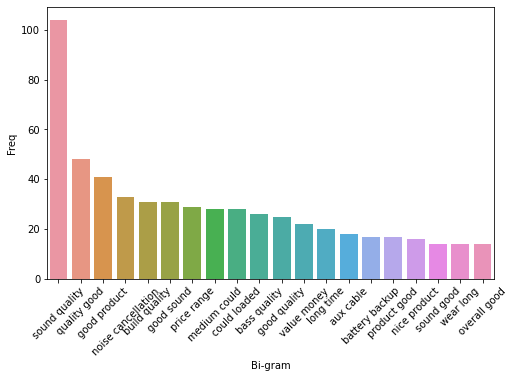

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 5)) #figure size of the visualization
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

Tri-gram

In [51]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [52]:
top3_words = get_top_n3_words(amazon['reviews'] , n=5000)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

top3_df

Tri-gram  Freq
0                       medium could loaded    28
1                        sound quality good    23
2                        good sound quality    16
3                quality noise cancellation     8
4                            wear long time     7
5                         bass quality good     6
6                      overall good product     6
7                      quality bass quality     6
8                       product price range     6
9                       sound quality noise     6
10                        the sound quality     5
11                       sound quality bass     5
12                    product sound quality     5
13                         the medium could     5
14                     goodthe medium could     5
15                  good noise cancellation     4
16                      battery backup good     4
17                         boat rockerz 370     4
18                      build quality cheap     4
19                     headphone good sound     4
20                        very nice product     4
21                         good price range     4
22                  noise cancellation also     4
23                       quality good noise     3
24                      good battery backup     3
25               sound qualitysound quality     3
26                      build quality could     3
27                       sound quality nice     3
28                          quality good it     3
29                       good product price     3
30                     sound quality superb     3
31                       build quality good     3
32                       like sound quality     3
33                       good product sound     3
34                      liked sound quality     3
35                         the battery life     3
36                        very good product     3
37                            can wear long     3
38                         boat rockerz 450     3
39                        good product good     3
40                    sound quality awesome     3
41                     sound quality really     3
42                        good quality bass     3
43                    headphone price range     3
44                  noise cancellation good     3
45                          could loaded it     3
46                        aux cable quality     3
47                        ear start paining     3
48                       very goodvery good     3
49                    headphone value money     3
50                   headphone good quality     3
51                            ear wear long     2
52                             bass also ok     2
53                            long time use     2
54                         the main problem     2
55                 nice productnice product     2
56                     better sound quality     2
57                    superb battery backup     2
58                     battery backup sound     2
59                  noise cancellation work     2
60                         high suggest buy     2
61                  productthe medium could     2
62                     quality good compare     2
63                       good compare price     2
64                  purpose listening music     2
65                    listening music audio     2
66                    music audio recommend     2
67                   audio recommend office     2
68                       everything is good     2
69                        quality also good     2
70                        the quality sound     2
71                        quality nice bass     2
72                 like product comfortable     2
73                product replace headphone     2
74                replace headphone getting     2
75          headphone getting automatically     2
76               getting automatically turn     2
77                           good bass also     2
78                       good quality sound     2
79                       headphone 

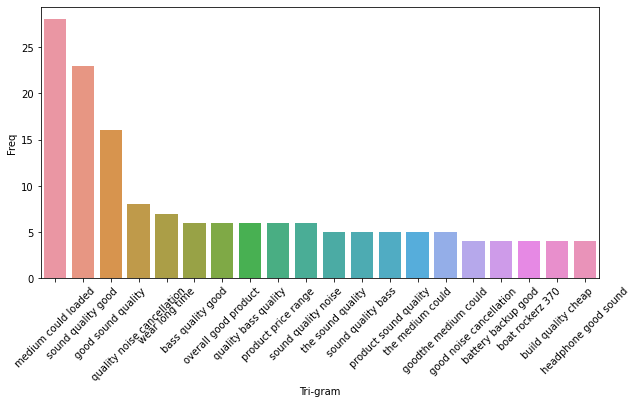

In [53]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

# Named Entity Recognition (NER)

In [54]:
import string 
import re #regular expression
import spacy

In [55]:
nlp = spacy.load("en_core_web_sm")

one_block = str(amazon['reviews'])
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [56]:
#nouns and verbs in the text
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['quality', 'quality', 'superb', 'sound', 'thing', 's', 'p', 'price', 'rangegood', 'battery', 'backup', 'value', 'moneyit', 'headphone', 'compared', 'price', 'headsetlike', 'color', 'year', 'use', 'cousin', 'covering', 'get', 'torn', 'timebui', 'goodliked', 'productear', 'pain', 'placed', 'ear', 'bestin', 'audio', 'sound', 'usecons', 'casual', 'get', 'pay', 'productnice', 'product', 'productin', 'price', 'product', 'goodgood', 'budgetthing', 'sound', 'buying', '899i', 'received', 'product', 'scratch', 'cle', 'rockrez', 'month', 'used', 'productmic', 'bass', 'good', 'priceworth', 'expect', 'ear', 'using', 'form', 'havey', 'start', 'goodgood', 'productnice', 'product', 'sound', 'medium', 'loaded', 'handphone', 'quality', 'cance', 'oneear', 'muff', 'feeling', 'pain', 'wearing', 'quality', 'quality', 'price', 'co', 'performancequality', 'price', 'product', 'comfortablethis', 'headphone', 'good', 'medium', 'loaded', 'buy', 'price', 'rangesound', 'quality', 'compar', 'purpose', 'listening', 

In [57]:

len(nouns_verbs)

1837

In [58]:
#Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#with collected nouns and verbs
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','count']
wd_df

words  count
0                 product    147
1                 quality    139
2                   sound     85
3               headphone     62
4                   price     48
5                    good     31
6                     ear     24
7                  medium     22
8                 battery     20
9                   value     20
10                   bass     20
11               goodgood     18
12                   boat     17
13                  money     17
14                    buy     16
15                  month     15
16                 loaded     15
17                     go     12
18                  using     11
19                  music     11
20                  thing     10
21                    use      9
22                    get      9
23                  build      9
24                  range      9
25                 budget      9
26                 superb      8
27                 backup      7
28                   used      7
29              bluetooth      7
30               charging      7
31                  cable      7
32                    got      7
33                   wear      7
34                cushion      7
35                   pain      6
36                  voice      6
37                plastic      6
38               material      6
39                  loved      6
40                working      6
41                  liked      6
42                  audio      5
43                   work      5
44                rockerz      5
45                  issue      5
46                  broke      5
47                comfort      5
48                  noise      5
49                packing      5
50            productvery      5
51                looking      5
52                   wire      5
53                    day      5
54                   hear      5
55             experience      5
56                   need      5
57                 bought      5
58                   want      5
59               purchase      5
60                  waste      5
61               goodvery      5
62           cancellation      5
63                   year      4
64            productnice      4
65                 buying      4
66            performance      4
67                   side      4
68                   hurt      4
69                   mind      4
70                   love      4
71                   size      4
72                   time      4
73                   feel      4
74                 volume      4
75                   head      4
76                   call      4
77                 weight      4
78                 choice      4
79                   item      4
80                   life      4
81               received      3
82                 expect      3
83                  start      3
84              listening      3
85              reviewthe      3
86                   pick      3
87           connectivity      3
88                    goo      3
89                     ok      3
90            qualitygood      3
91                headset      3
92                   song      3
93           productsound      3
94                     it      3
95                  video      3
96              purchased      3
97                   hour      3
98                  worth      3
99             productthe      3
100            qualitythe      3
101                   try      3
102             connected      3
103               damaged      3
104              expected      3
105           productgood      3
106             rangegood      2
107                 color      2
108               scratch      2
109               feeling      2
110                    co      2
111             recommend      2
112             goodsound      2
113                  like      2
114            everything      2
115               meeting      2
116                 looks      2
117               getting      2
118                   min      2
119                goodit      2
120                  ears  

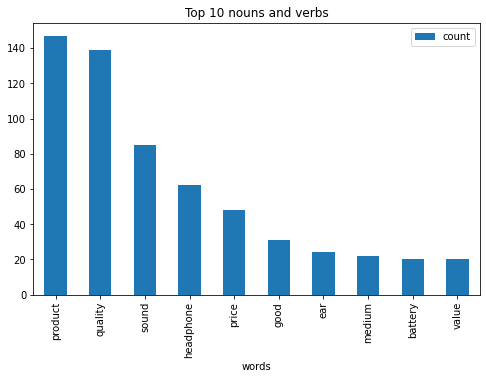

In [59]:
# Visualizing results (Barchart for top 10[nouns + verbs])

wd_df[0:10].plot.bar(x='words',figsize=(8,5),title='Top 10 nouns and verbs');
plt.show()

# Word Cloud

In [60]:
from PIL import Image

<Figure size 432x288 with 0 Axes>

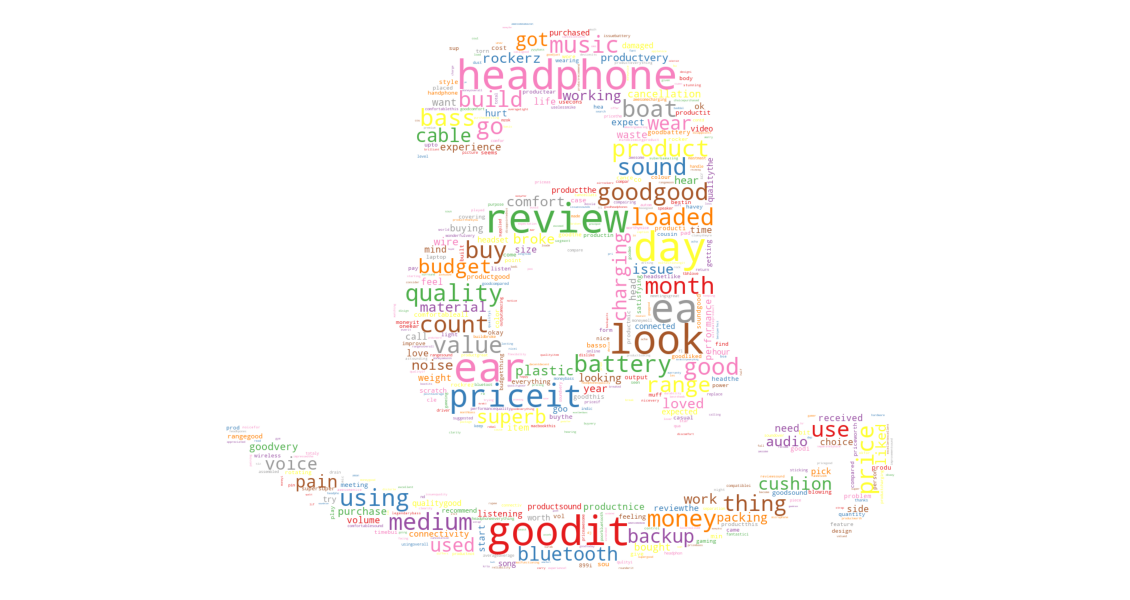

In [65]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('words')
STOPWORDS.add('rt')
STOPWORDS.add('it')
STOPWORDS.add('yeah')
mask = np.array(Image.open("D:\\DATA SCIENCE\\Project\\Sentiment Analysis on Amazon Product Reviews\\amazon_icon.png"))
wordcloud = WordCloud(width=10000,height=5000,background_color='white',max_words=500,
                   colormap='Set1', mask=mask, stopwords=STOPWORDS).generate(str(wd_df))
plt.savefig("amazon.png", format="png")
plot_cloud(wordcloud)
plt.show()

## Sentiment Analysis for each word

In [66]:
#sentiment
wd_df['words'][:5].apply(lambda x: TextBlob(x).sentiment)
wd_df['sentiment'] = wd_df['words'].apply(lambda x: TextBlob(x).sentiment[0] )
wd_df[['words','sentiment']]

words  sentiment
0                 product   0.000000
1                 quality   0.000000
2                   sound   0.400000
3               headphone   0.000000
4                   price   0.000000
5                    good   0.700000
6                     ear   0.000000
7                  medium   0.000000
8                 battery   0.000000
9                   value   0.000000
10                   bass  -0.150000
11               goodgood   0.000000
12                   boat   0.000000
13                  money   0.000000
14                    buy   0.000000
15                  month   0.000000
16                 loaded   0.000000
17                     go   0.000000
18                  using   0.000000
19                  music   0.000000
20                  thing   0.000000
21                    use   0.000000
22                    get   0.000000
23                  build   0.000000
24                  range   0.000000
25                 budget   0.000000
26                 superb   1.000000
27                 backup   0.000000
28                   used   0.000000
29              bluetooth   0.000000
30               charging   0.000000
31                  cable   0.000000
32                    got   0.000000
33                   wear   0.000000
34                cushion   0.000000
35                   pain   0.000000
36                  voice   0.000000
37                plastic   0.000000
38               material   0.000000
39                  loved   0.700000
40                working   0.000000
41                  liked   0.600000
42                  audio   0.000000
43                   work   0.000000
44                rockerz   0.000000
45                  issue   0.000000
46                  broke   0.000000
47                comfort   0.000000
48                  noise   0.000000
49                packing   0.000000
50            productvery   0.000000
51                looking   0.000000
52                   wire   0.000000
53                    day   0.000000
54                   hear   0.000000
55             experience   0.000000
56                   need   0.000000
57                 bought   0.000000
58                   want   0.000000
59               purchase   0.000000
60                  waste  -0.200000
61               goodvery   0.000000
62           cancellation   0.000000
63                   year   0.000000
64            productnice   0.000000
65                 buying   0.000000
66            performance   0.000000
67                   side   0.000000
68                   hurt   0.000000
69                   mind   0.000000
70                   love   0.500000
71                   size   0.000000
72                   time   0.000000
73                   feel   0.000000
74                 volume   0.000000
75                   head   0.000000
76                   call   0.000000
77                 weight   0.000000
78                 choice   0.000000
79                   item   0.000000
80                   life   0.000000
81               received   0.000000
82                 expect   0.000000
83                  start   0.000000
84              listening   0.000000
85              reviewthe   0.000000
86                   pick   0.000000
87           connectivity   0.000000
88                    goo   0.000000
89                     ok   0.500000
90            qualitygood   0.000000
91                headset   0.000000
92                   song   0.000000
93           productsound   0.000000
94                     it   0.000000
95                  video   0.000000
96              purchased   0.000000
97                   hour   0.000000
98                  worth   0.300000
99             productthe   0.000000
100            qualitythe   0.000000
101                   try   0.000000
102             connected   0.000000
103               damaged   0.000000
104              expected  -0.100000
105           productgood   0.000000
106             rangegood   0.000000
107                 colo

In [67]:
#  subjectivity and polarity 
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

wd_df['Subjectivity'] = wd_df['words'].apply(getSubjectivity)
wd_df['Polarity'] = wd_df['words'].apply(getPolarity)


In [68]:
wd_df

words  count  sentiment  Subjectivity  Polarity
0                 product    147   0.000000      0.000000  0.000000
1                 quality    139   0.000000      0.000000  0.000000
2                   sound     85   0.400000      0.400000  0.400000
3               headphone     62   0.000000      0.000000  0.000000
4                   price     48   0.000000      0.000000  0.000000
5                    good     31   0.700000      0.600000  0.700000
6                     ear     24   0.000000      0.000000  0.000000
7                  medium     22   0.000000      0.000000  0.000000
8                 battery     20   0.000000      0.000000  0.000000
9                   value     20   0.000000      0.000000  0.000000
10                   bass     20  -0.150000      0.500000 -0.150000
11               goodgood     18   0.000000      0.000000  0.000000
12                   boat     17   0.000000      0.000000  0.000000
13                  money     17   0.000000      0.000000  0.000000
14                    buy     16   0.000000      0.000000  0.000000
15                  month     15   0.000000      0.000000  0.000000
16                 loaded     15   0.000000      0.000000  0.000000
17                     go     12   0.000000      0.000000  0.000000
18                  using     11   0.000000      0.000000  0.000000
19                  music     11   0.000000      0.000000  0.000000
20                  thing     10   0.000000      0.000000  0.000000
21                    use      9   0.000000      0.000000  0.000000
22                    get      9   0.000000      0.000000  0.000000
23                  build      9   0.000000      0.000000  0.000000
24                  range      9   0.000000      0.000000  0.000000
25                 budget      9   0.000000      0.000000  0.000000
26                 superb      8   1.000000      1.000000  1.000000
27                 backup      7   0.000000      0.000000  0.000000
28                   used      7   0.000000      0.000000  0.000000
29              bluetooth      7   0.000000      0.000000  0.000000
30               charging      7   0.000000      0.000000  0.000000
31                  cable      7   0.000000      0.000000  0.000000
32                    got      7   0.000000      0.000000  0.000000
33                   wear      7   0.000000      0.000000  0.000000
34                cushion      7   0.000000      0.000000  0.000000
35                   pain      6   0.000000      0.000000  0.000000
36                  voice      6   0.000000      0.000000  0.000000
37                plastic      6   0.000000      0.000000  0.000000
38               material      6   0.000000      0.000000  0.000000
39                  loved      6   0.700000      0.800000  0.700000
40                working      6   0.000000      0.000000  0.000000
41                  liked      6   0.600000      0.800000  0.600000
42                  audio      5   0.000000      0.000000  0.000000
43                   work      5   0.000000      0.000000  0.000000
44                rockerz      5   0.000000      0.000000  0.000000
45                  issue      5   0.000000      0.000000  0.000000
46                  broke      5   0.000000      0.000000  0.000000
47                comfort      5   0.000000      0.000000  0.000000
48                  noise      5   0.000000      0.000000  0.000000
49                packing      5   0.000000      0.000000  0.000000
50            productvery      5   0.000000      0.000000  0.000000
51                looking      5   0.000000      0.000000  0.000000
52                   wire      5   0.000000      0.000000  0.000000
53                    day      5   0.000000      0.000000  0.000000
54                   hear      5   0.000000      0.000000  0.000000
55             experience      5   0.000000      0.000000  0.000000
56                   need      5   0.000000      0.000000  0.000000
57                 bought      5   0.000000      0.000000  0.000000
58      

In [69]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
wd_df['Analysis'] = wd_df['Polarity'].apply(getAnalysis)

In [70]:
wd_df

words  count  sentiment  Subjectivity  Polarity  Analysis
0                 product    147   0.000000      0.000000  0.000000   Neutral
1                 quality    139   0.000000      0.000000  0.000000   Neutral
2                   sound     85   0.400000      0.400000  0.400000  Positive
3               headphone     62   0.000000      0.000000  0.000000   Neutral
4                   price     48   0.000000      0.000000  0.000000   Neutral
5                    good     31   0.700000      0.600000  0.700000  Positive
6                     ear     24   0.000000      0.000000  0.000000   Neutral
7                  medium     22   0.000000      0.000000  0.000000   Neutral
8                 battery     20   0.000000      0.000000  0.000000   Neutral
9                   value     20   0.000000      0.000000  0.000000   Neutral
10                   bass     20  -0.150000      0.500000 -0.150000  Negative
11               goodgood     18   0.000000      0.000000  0.000000   Neutral
12                   boat     17   0.000000      0.000000  0.000000   Neutral
13                  money     17   0.000000      0.000000  0.000000   Neutral
14                    buy     16   0.000000      0.000000  0.000000   Neutral
15                  month     15   0.000000      0.000000  0.000000   Neutral
16                 loaded     15   0.000000      0.000000  0.000000   Neutral
17                     go     12   0.000000      0.000000  0.000000   Neutral
18                  using     11   0.000000      0.000000  0.000000   Neutral
19                  music     11   0.000000      0.000000  0.000000   Neutral
20                  thing     10   0.000000      0.000000  0.000000   Neutral
21                    use      9   0.000000      0.000000  0.000000   Neutral
22                    get      9   0.000000      0.000000  0.000000   Neutral
23                  build      9   0.000000      0.000000  0.000000   Neutral
24                  range      9   0.000000      0.000000  0.000000   Neutral
25                 budget      9   0.000000      0.000000  0.000000   Neutral
26                 superb      8   1.000000      1.000000  1.000000  Positive
27                 backup      7   0.000000      0.000000  0.000000   Neutral
28                   used      7   0.000000      0.000000  0.000000   Neutral
29              bluetooth      7   0.000000      0.000000  0.000000   Neutral
30               charging      7   0.000000      0.000000  0.000000   Neutral
31                  cable      7   0.000000      0.000000  0.000000   Neutral
32                    got      7   0.000000      0.000000  0.000000   Neutral
33                   wear      7   0.000000      0.000000  0.000000   Neutral
34                cushion      7   0.000000      0.000000  0.000000   Neutral
35                   pain      6   0.000000      0.000000  0.000000   Neutral
36                  voice      6   0.000000      0.000000  0.000000   Neutral
37                plastic      6   0.000000      0.000000  0.000000   Neutral
38               material      6   0.000000      0.000000  0.000000   Neutral
39                  loved      6   0.700000      0.800000  0.700000  Positive
40                working      6   0.000000      0.000000  0.000000   Neutral
41                  liked      6   0.600000      0.800000  0.600000  Positive
42                  audio      5   0.000000      0.000000  0.000000   Neutral
43                   work      5   0.000000      0.000000  0.000000   Neutral
44                rockerz      5   0.000000      0.000000  0.000000   Neutral
45                  issue      5   0.000000      0.000000  0.000000   Neutral
46                  broke      5   0.000000      0.000000  0.000000   Neutral
47                comfort      5   0.000000      0.000000  0.000000   Neutral
48                  noise      5   0.000000      0.000000  0.000000   Neutral
49                packing      5   0.000000      0.000000  0.000000   Neutral
50            productvery      5   0.00000

In [71]:
wd_df['Analysis'].count

<bound method Series.count of 0       Neutral
1       Neutral
2      Positive
3       Neutral
4       Neutral
5      Positive
6       Neutral
7       Neutral
8       Neutral
9       Neutral
10     Negative
11      Neutral
12      Neutral
13      Neutral
14      Neutral
15      Neutral
16      Neutral
17      Neutral
18      Neutral
19      Neutral
20      Neutral
21      Neutral
22      Neutral
23      Neutral
24      Neutral
25      Neutral
26     Positive
27      Neutral
28      Neutral
29      Neutral
30      Neutral
31      Neutral
32      Neutral
33      Neutral
34      Neutral
35      Neutral
36      Neutral
37      Neutral
38      Neutral
39     Positive
40      Neutral
41     Positive
42      Neutral
43      Neutral
44      Neutral
45      Neutral
46      Neutral
47      Neutral
48      Neutral
49      Neutral
50      Neutral
51      Neutral
52      Neutral
53      Neutral
54      Neutral
55      Neutral
56      Neutral
57      Neutral
58      Neutral
59      Neutral
60     Neg

<AxesSubplot:>

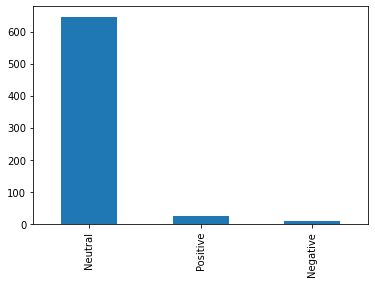

In [72]:
wd_df['Analysis'].value_counts().plot(kind='bar')

# Sentiment Analysis for each review

In [77]:
amazon['reviews'][:5].apply(lambda x: TextBlob(x).sentiment)


0                                 (0.43125, 0.7)
1      (0.34861111111111115, 0.5444444444444444)
2                      (0.7, 0.6000000000000001)
3                                     (0.0, 0.0)
4    (0.011111111111111108, 0.48888888888888893)
Name: reviews, dtype: object

In [78]:
amazon['sentiment'] = amazon['reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
amazon[['reviews','sentiment']]

reviews     sentiment
0    best quality & value moneysound quality superb...  4.312500e-01
1    great sound qualityoverall great thing thats p...  3.486111e-01
2              good one price rangegood battery backup  7.000000e-01
3                                             atifgood  0.000000e+00
4    value moneyit's good headphone compared price....  1.111111e-02
5                          good headsetlike color bass  2.750000e-01
6    good year use cousin covering get torn timebui...  3.149573e-01
7                                             goodlike  0.000000e+00
8                                            goodliked  0.000000e+00
9      nice productear fitting pain getting placed ear  5.500000e-01
10                                           nice good  6.500000e-01
11   it's much comfortable audio wise bestin audio ...  5.800000e-01
12   sound good uncomfortable long usecons -the bas...  2.411111e-01
13   great casual listening.you get pay for. the so...  1.083829e-01
14                                           oknot bad -7.000000e-01
15                       it's nice productnice product  6.000000e-01
16          good productin price good product. satisfy  7.000000e-01
17                                         not bedgood  0.000000e+00
18                                            goodgood  0.000000e+00
19   good 1000 budgetthing good sound awesomebut qu...  5.800000e-01
20   worth buying 899i received product scratch cle...  4.000000e-01
21   rockrez 370more 1 month used superb battery ba...  4.666667e-01
22                        good productmic & bass good.  4.166667e-01
23                    nice much priceworth expect much  3.333333e-01
24   too heavy ear using form 3monthsto havey,start... -2.000000e-01
25                                           soundgood  0.000000e+00
26                                            goodgood  0.000000e+00
27                            nice productnice product  6.000000e-01
28   i like sound itthe medium could loaded. the so...  4.000000e-01
29   handphone good.sound quality good, noise cance...  2.500000e-01
30       decent oneear muff soft, feeling pain wearing  1.333333e-01
31   good quality lowest pricegood quality price co...  2.750000e-01
32   amazing performancequality awesome, best price...  8.250000e-01
33   average product comfortablethis headphone good...  1.872727e-01
34                best productthe medium could loaded.  1.000000e+00
35   worth buy price rangesound quality good compar...  3.476190e-01
36   good purpose listening music audio recommend o...  7.000000e-01
37      goodsound quality good,nice performance i like  0.000000e+00
38   everything is good.everything is good but some...  3.343434e-01
39   one ear workingonly one side work side work fl...  0.000000e+00
40   overall good compairing money.good keep ear lo... -1.100000e-01
41   great online meetingsgreat online meeting good...  4.375000e-01
42   sound qualitysound quality good... compare pri...  4.125000e-01
43   true thing headphone:-everything best headphon...  6.375000e-01
44   boat rockerz 370 reviewthe product good build ...  5.125000e-01
45                                                okok  0.000000e+00
46   good sound quality, mic good (not suggested of...  5.000000e-01
47   voice separation quality song goodsuperb batte...  2.416667e-01
48   value money comfortablesound quality, bluetoot...  2.546154e-01
49   good moneybass quality great, good pick price....  5.375000e-01
50   good price....looks good, bass ok, much comfor...  4.611111e-01
51   return product replace headphone getting autom...  0.000000e+00
52   good one low price.this product overall good. ...  3.250000e-01
53             good price....total plastic material...  7.000000e-01
54   it nice product comfortable 30 45 min ear star...  4.666667e-01
55   about headphoneeverything nice headphone conne...  6.000000e-01
56   best segmentthis headphone made music expect u...  2.575000e-01
57    good product price rangegood product pr

## Subjectivity and Polarity 

In [79]:
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

amazon['Subjectivity'] = amazon['reviews'].apply(getSubjectivity)
amazon['Polarity'] = amazon['reviews'].apply(getPolarity)


In [80]:
amazon

rating                                            reviews     sentiment  \
0      4.0  best quality & value moneysound quality superb...  4.312500e-01   
1      4.0  great sound qualityoverall great thing thats p...  3.486111e-01   
2      4.0            good one price rangegood battery backup  7.000000e-01   
3      4.0                                           atifgood  0.000000e+00   
4      4.0  value moneyit's good headphone compared price....  1.111111e-02   
5      4.0                        good headsetlike color bass  2.750000e-01   
6      4.0  good year use cousin covering get torn timebui...  3.149573e-01   
7      4.0                                           goodlike  0.000000e+00   
8      4.0                                          goodliked  0.000000e+00   
9      4.0    nice productear fitting pain getting placed ear  5.500000e-01   
10     4.0                                          nice good  6.500000e-01   
11     4.0  it's much comfortable audio wise bestin audio ...  5.800000e-01   
12     3.0  sound good uncomfortable long usecons -the bas...  2.411111e-01   
13     4.0  great casual listening.you get pay for. the so...  1.083829e-01   
14     4.0                                          oknot bad -7.000000e-01   
15     4.0                      it's nice productnice product  6.000000e-01   
16     4.0         good productin price good product. satisfy  7.000000e-01   
17     4.0                                        not bedgood  0.000000e+00   
18     4.0                                           goodgood  0.000000e+00   
19     4.0  good 1000 budgetthing good sound awesomebut qu...  5.800000e-01   
20     4.0  worth buying 899i received product scratch cle...  4.000000e-01   
21     4.0  rockrez 370more 1 month used superb battery ba...  4.666667e-01   
22     4.0                       good productmic & bass good.  4.166667e-01   
23     4.0                   nice much priceworth expect much  3.333333e-01   
24     4.0  too heavy ear using form 3monthsto havey,start... -2.000000e-01   
25     4.0                                          soundgood  0.000000e+00   
26     4.0                                           goodgood  0.000000e+00   
27     4.0                           nice productnice product  6.000000e-01   
28     4.0  i like sound itthe medium could loaded. the so...  4.000000e-01   
29     4.0  handphone good.sound quality good, noise cance...  2.500000e-01   
30     4.0      decent oneear muff soft, feeling pain wearing  1.333333e-01   
31     4.0  good quality lowest pricegood quality price co...  2.750000e-01   
32     4.0  amazing performancequality awesome, best price...  8.250000e-01   
33     4.0  average product comfortablethis headphone good...  1.872727e-01   
34     4.0               best productthe medium could loaded.  1.000000e+00   
35     4.0  worth buy price rangesound quality good compar...  3.476190e-01   
36     3.0  good purpose listening music audio recommend o...  7.000000e-01   
37     4.0     goodsound quality good,nice performance i like  0.000000e+00   
38     4.0  everything is good.everything is good but some...  3.343434e-01   
39     3.0  one ear workingonly one side work side work fl...  0.000000e+00   
40     3.0  overall good compairing money.good keep ear lo... -1.100000e-01   
41     4.0  great online meetingsgreat online meeting good...  4.375000e-01   
42     4.0  sound qualitysound quality good... compare pri...  4.125000e-01   
43     4.0  true thing headphone:-everything best headphon...  6.375000e-01   
44     4.0  boat rockerz 370 reviewthe product good build ...  5.125000e-01   
45     3.0                                               okok  0.000000e+00   
46     3.0  good sound quality, mic good (not suggested of...  5.000000e-01   
47     5.0  voice separation quality song goodsuperb batte...  2.416667e-01   
48     3.0  value money comfortablesound quality, bluetoot...  2.546154e-01   
49     4.0  good moneybass quality great, good pick pr

In [81]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
amazon['Analysis'] = amazon['Polarity'].apply(getAnalysis)

In [82]:
amazon

rating                                            reviews     sentiment  \
0      4.0  best quality & value moneysound quality superb...  4.312500e-01   
1      4.0  great sound qualityoverall great thing thats p...  3.486111e-01   
2      4.0            good one price rangegood battery backup  7.000000e-01   
3      4.0                                           atifgood  0.000000e+00   
4      4.0  value moneyit's good headphone compared price....  1.111111e-02   
5      4.0                        good headsetlike color bass  2.750000e-01   
6      4.0  good year use cousin covering get torn timebui...  3.149573e-01   
7      4.0                                           goodlike  0.000000e+00   
8      4.0                                          goodliked  0.000000e+00   
9      4.0    nice productear fitting pain getting placed ear  5.500000e-01   
10     4.0                                          nice good  6.500000e-01   
11     4.0  it's much comfortable audio wise bestin audio ...  5.800000e-01   
12     3.0  sound good uncomfortable long usecons -the bas...  2.411111e-01   
13     4.0  great casual listening.you get pay for. the so...  1.083829e-01   
14     4.0                                          oknot bad -7.000000e-01   
15     4.0                      it's nice productnice product  6.000000e-01   
16     4.0         good productin price good product. satisfy  7.000000e-01   
17     4.0                                        not bedgood  0.000000e+00   
18     4.0                                           goodgood  0.000000e+00   
19     4.0  good 1000 budgetthing good sound awesomebut qu...  5.800000e-01   
20     4.0  worth buying 899i received product scratch cle...  4.000000e-01   
21     4.0  rockrez 370more 1 month used superb battery ba...  4.666667e-01   
22     4.0                       good productmic & bass good.  4.166667e-01   
23     4.0                   nice much priceworth expect much  3.333333e-01   
24     4.0  too heavy ear using form 3monthsto havey,start... -2.000000e-01   
25     4.0                                          soundgood  0.000000e+00   
26     4.0                                           goodgood  0.000000e+00   
27     4.0                           nice productnice product  6.000000e-01   
28     4.0  i like sound itthe medium could loaded. the so...  4.000000e-01   
29     4.0  handphone good.sound quality good, noise cance...  2.500000e-01   
30     4.0      decent oneear muff soft, feeling pain wearing  1.333333e-01   
31     4.0  good quality lowest pricegood quality price co...  2.750000e-01   
32     4.0  amazing performancequality awesome, best price...  8.250000e-01   
33     4.0  average product comfortablethis headphone good...  1.872727e-01   
34     4.0               best productthe medium could loaded.  1.000000e+00   
35     4.0  worth buy price rangesound quality good compar...  3.476190e-01   
36     3.0  good purpose listening music audio recommend o...  7.000000e-01   
37     4.0     goodsound quality good,nice performance i like  0.000000e+00   
38     4.0  everything is good.everything is good but some...  3.343434e-01   
39     3.0  one ear workingonly one side work side work fl...  0.000000e+00   
40     3.0  overall good compairing money.good keep ear lo... -1.100000e-01   
41     4.0  great online meetingsgreat online meeting good...  4.375000e-01   
42     4.0  sound qualitysound quality good... compare pri...  4.125000e-01   
43     4.0  true thing headphone:-everything best headphon...  6.375000e-01   
44     4.0  boat rockerz 370 reviewthe product good build ...  5.125000e-01   
45     3.0                                               okok  0.000000e+00   
46     3.0  good sound quality, mic good (not suggested of...  5.000000e-01   
47     5.0  voice separation quality song goodsuperb batte...  2.416667e-01   
48     3.0  value money comfortablesound quality, bluetoot...  2.546154e-01   
49     4.0  good moneybass quality great, good pick pr

<AxesSubplot:>

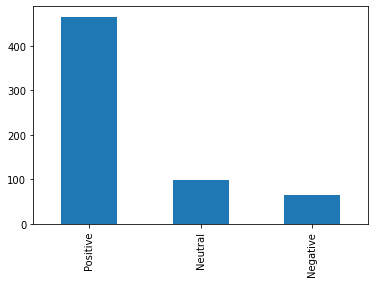

In [83]:
amazon['Analysis'].value_counts().plot(kind='bar')

In [84]:
amazon

rating                                            reviews     sentiment  \
0      4.0  best quality & value moneysound quality superb...  4.312500e-01   
1      4.0  great sound qualityoverall great thing thats p...  3.486111e-01   
2      4.0            good one price rangegood battery backup  7.000000e-01   
3      4.0                                           atifgood  0.000000e+00   
4      4.0  value moneyit's good headphone compared price....  1.111111e-02   
5      4.0                        good headsetlike color bass  2.750000e-01   
6      4.0  good year use cousin covering get torn timebui...  3.149573e-01   
7      4.0                                           goodlike  0.000000e+00   
8      4.0                                          goodliked  0.000000e+00   
9      4.0    nice productear fitting pain getting placed ear  5.500000e-01   
10     4.0                                          nice good  6.500000e-01   
11     4.0  it's much comfortable audio wise bestin audio ...  5.800000e-01   
12     3.0  sound good uncomfortable long usecons -the bas...  2.411111e-01   
13     4.0  great casual listening.you get pay for. the so...  1.083829e-01   
14     4.0                                          oknot bad -7.000000e-01   
15     4.0                      it's nice productnice product  6.000000e-01   
16     4.0         good productin price good product. satisfy  7.000000e-01   
17     4.0                                        not bedgood  0.000000e+00   
18     4.0                                           goodgood  0.000000e+00   
19     4.0  good 1000 budgetthing good sound awesomebut qu...  5.800000e-01   
20     4.0  worth buying 899i received product scratch cle...  4.000000e-01   
21     4.0  rockrez 370more 1 month used superb battery ba...  4.666667e-01   
22     4.0                       good productmic & bass good.  4.166667e-01   
23     4.0                   nice much priceworth expect much  3.333333e-01   
24     4.0  too heavy ear using form 3monthsto havey,start... -2.000000e-01   
25     4.0                                          soundgood  0.000000e+00   
26     4.0                                           goodgood  0.000000e+00   
27     4.0                           nice productnice product  6.000000e-01   
28     4.0  i like sound itthe medium could loaded. the so...  4.000000e-01   
29     4.0  handphone good.sound quality good, noise cance...  2.500000e-01   
30     4.0      decent oneear muff soft, feeling pain wearing  1.333333e-01   
31     4.0  good quality lowest pricegood quality price co...  2.750000e-01   
32     4.0  amazing performancequality awesome, best price...  8.250000e-01   
33     4.0  average product comfortablethis headphone good...  1.872727e-01   
34     4.0               best productthe medium could loaded.  1.000000e+00   
35     4.0  worth buy price rangesound quality good compar...  3.476190e-01   
36     3.0  good purpose listening music audio recommend o...  7.000000e-01   
37     4.0     goodsound quality good,nice performance i like  0.000000e+00   
38     4.0  everything is good.everything is good but some...  3.343434e-01   
39     3.0  one ear workingonly one side work side work fl...  0.000000e+00   
40     3.0  overall good compairing money.good keep ear lo... -1.100000e-01   
41     4.0  great online meetingsgreat online meeting good...  4.375000e-01   
42     4.0  sound qualitysound quality good... compare pri...  4.125000e-01   
43     4.0  true thing headphone:-everything best headphon...  6.375000e-01   
44     4.0  boat rockerz 370 reviewthe product good build ...  5.125000e-01   
45     3.0                                               okok  0.000000e+00   
46     3.0  good sound quality, mic good (not suggested of...  5.000000e-01   
47     5.0  voice separation quality song goodsuperb batte...  2.416667e-01   
48     3.0  value money comfortablesound quality, bluetoot...  2.546154e-01   
49     4.0  good moneybass quality great, good pick pr

## Generate Positive Reviews Word Cloud

In [85]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,max_words=300,background_color='black')

In [86]:
Positive = wc.generate(amazon[amazon['Polarity']>0]['reviews'].str.cat(sep=""))

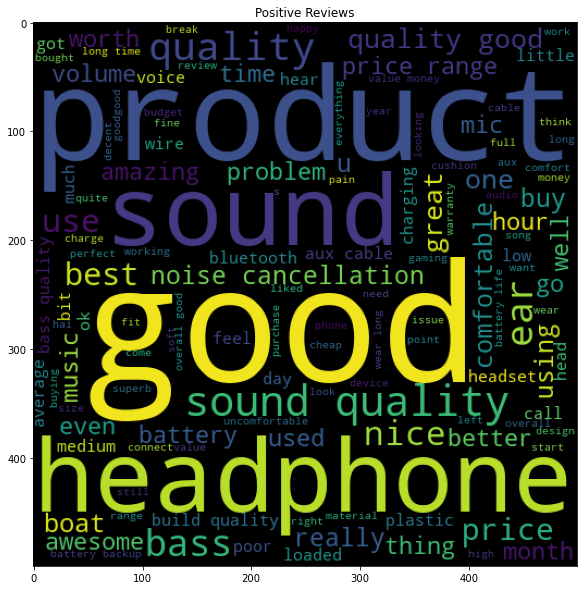

In [87]:
plt.figure(figsize=(10,10))
plt.imshow(Positive)
plt.title('Positive Reviews')
plt.show()

## Generate Negative Reviews Word Cloud

In [88]:
Negative=wc.generate(amazon[amazon['Polarity']<0]['reviews'].str.cat(sep=""))

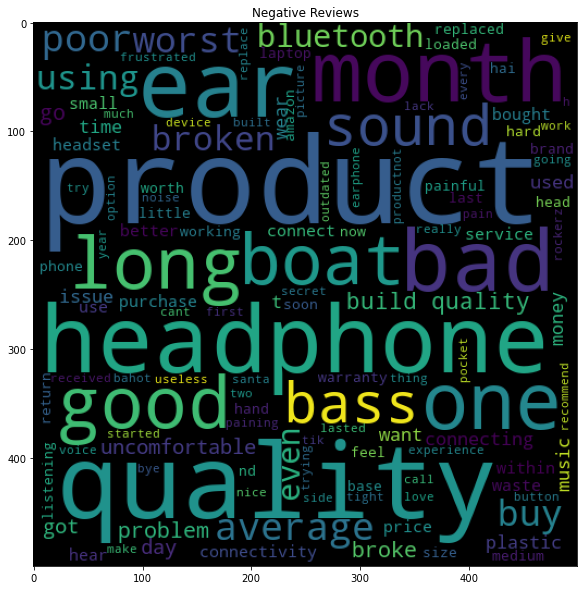

In [89]:
plt.figure(figsize=(10,10))
plt.imshow(Negative)
plt.title('Negative Reviews')
plt.show()

## Generate Neutral Reviews Word Cloud

In [90]:
Neutral = wc.generate(amazon[amazon['Polarity']==0]['reviews'].str.cat(sep=""))

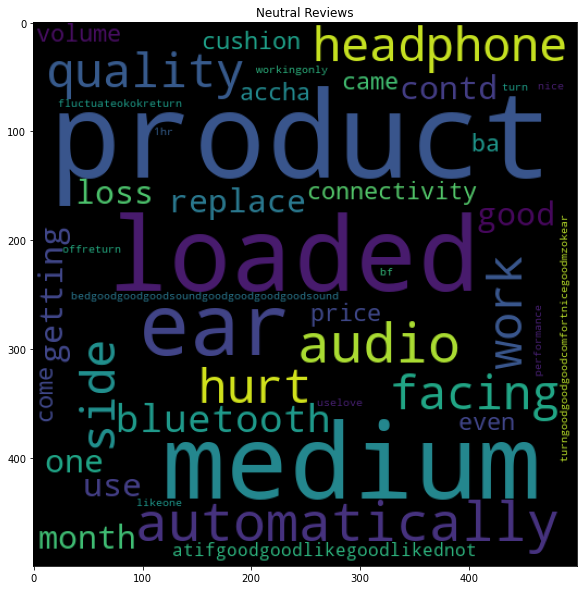

In [91]:
plt.figure(figsize=(10,10))
plt.imshow(Neutral)
plt.title('Neutral Reviews')
plt.show()

# Model Building 

In [92]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [93]:
x=vectorizer.fit_transform(amazon['reviews'])

In [94]:
#rows, reviews
x.shape

(630, 2120)

### LabelEncoder for classification Model

In [95]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [96]:
amazon['target']=encoder.fit_transform(amazon['Analysis'])
amazon

rating                                            reviews     sentiment  \
0      4.0  best quality & value moneysound quality superb...  4.312500e-01   
1      4.0  great sound qualityoverall great thing thats p...  3.486111e-01   
2      4.0            good one price rangegood battery backup  7.000000e-01   
3      4.0                                           atifgood  0.000000e+00   
4      4.0  value moneyit's good headphone compared price....  1.111111e-02   
5      4.0                        good headsetlike color bass  2.750000e-01   
6      4.0  good year use cousin covering get torn timebui...  3.149573e-01   
7      4.0                                           goodlike  0.000000e+00   
8      4.0                                          goodliked  0.000000e+00   
9      4.0    nice productear fitting pain getting placed ear  5.500000e-01   
10     4.0                                          nice good  6.500000e-01   
11     4.0  it's much comfortable audio wise bestin audio ...  5.800000e-01   
12     3.0  sound good uncomfortable long usecons -the bas...  2.411111e-01   
13     4.0  great casual listening.you get pay for. the so...  1.083829e-01   
14     4.0                                          oknot bad -7.000000e-01   
15     4.0                      it's nice productnice product  6.000000e-01   
16     4.0         good productin price good product. satisfy  7.000000e-01   
17     4.0                                        not bedgood  0.000000e+00   
18     4.0                                           goodgood  0.000000e+00   
19     4.0  good 1000 budgetthing good sound awesomebut qu...  5.800000e-01   
20     4.0  worth buying 899i received product scratch cle...  4.000000e-01   
21     4.0  rockrez 370more 1 month used superb battery ba...  4.666667e-01   
22     4.0                       good productmic & bass good.  4.166667e-01   
23     4.0                   nice much priceworth expect much  3.333333e-01   
24     4.0  too heavy ear using form 3monthsto havey,start... -2.000000e-01   
25     4.0                                          soundgood  0.000000e+00   
26     4.0                                           goodgood  0.000000e+00   
27     4.0                           nice productnice product  6.000000e-01   
28     4.0  i like sound itthe medium could loaded. the so...  4.000000e-01   
29     4.0  handphone good.sound quality good, noise cance...  2.500000e-01   
30     4.0      decent oneear muff soft, feeling pain wearing  1.333333e-01   
31     4.0  good quality lowest pricegood quality price co...  2.750000e-01   
32     4.0  amazing performancequality awesome, best price...  8.250000e-01   
33     4.0  average product comfortablethis headphone good...  1.872727e-01   
34     4.0               best productthe medium could loaded.  1.000000e+00   
35     4.0  worth buy price rangesound quality good compar...  3.476190e-01   
36     3.0  good purpose listening music audio recommend o...  7.000000e-01   
37     4.0     goodsound quality good,nice performance i like  0.000000e+00   
38     4.0  everything is good.everything is good but some...  3.343434e-01   
39     3.0  one ear workingonly one side work side work fl...  0.000000e+00   
40     3.0  overall good compairing money.good keep ear lo... -1.100000e-01   
41     4.0  great online meetingsgreat online meeting good...  4.375000e-01   
42     4.0  sound qualitysound quality good... compare pri...  4.125000e-01   
43     4.0  true thing headphone:-everything best headphon...  6.375000e-01   
44     4.0  boat rockerz 370 reviewthe product good build ...  5.125000e-01   
45     3.0                                               okok  0.000000e+00   
46     3.0  good sound quality, mic good (not suggested of...  5.000000e-01   
47     5.0  voice separation quality song goodsuperb batte...  2.416667e-01   
48     3.0  value money comfortablesound quality, bluetoot...  2.546154e-01   
49     4.0  good moneybass quality great, good pick pr

In [97]:
y_svc=amazon['target'].values
y_svc

array([2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2,

In [98]:
from sklearn.model_selection import train_test_split   

In [99]:
X_train,X_test,y_train,y_test=train_test_split(x,y_svc,test_size=0.1,random_state=40)

# SVC

In [100]:
from sklearn.svm import SVC
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [101]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[25,20,10,1,0.5],'C':[20,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [20, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [25, 20, 10, 1, 0.5], 'kernel': ['rbf']}])

In [102]:
gsv.best_params_ , gsv.best_score_ 

({'C': 20, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7989348370927318)

In [103]:
clf = SVC(C= 20, gamma = 25)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 77.77777777777779


array([[ 0,  0,  9],
       [ 0,  3,  5],
       [ 0,  0, 46]], dtype=int64)

# KNN

In [104]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [106]:
print(grid_search.best_params_)

{'n_neighbors': 5}


In [107]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 76.88%


In [108]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

In [109]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [110]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [111]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 79.36507936507937


# Bagging Boosting 

In [112]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

In [114]:
dcmodel = dcmodel.fit(X_train,y_train) #train decision tree
y_predict = dcmodel.predict(X_test)

In [115]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  76.19047619047619


# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [117]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [118]:
rf.fit(X_train,y_train) # Fitting RandomForestClassifier model from sklearn.ensemble 
rf.estimators_ # 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.

rf.n_outputs_ # Number of outputs when fit performed

rf.oob_score_ 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


0.7760141093474426

In [119]:
rf.predict(X_test)

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [120]:
preds = rf.predict(X_test)
pd.Series(preds).value_counts()

2    59
1     4
dtype: int64

In [121]:
preds

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [122]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,preds)
crosstable

col_0  1   2
row_0       
0      1   8
1      3   5
2      0  46

In [123]:
# Final step we will calculate the accuracy of our model

# We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(preds==y_test)

0.7777777777777778

In [124]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.38      0.75      0.50         4
           2       1.00      0.78      0.88        59

    accuracy                           0.78        63
   macro avg       0.46      0.51      0.46        63
weighted avg       0.96      0.78      0.85        63



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost (Extreme Gradient Boosting)

In [125]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [126]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:17:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [127]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [128]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [129]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.89%


### XGBoost giving the best result, we can use it for deployment

In [130]:
amazon

rating                                            reviews     sentiment  \
0      4.0  best quality & value moneysound quality superb...  4.312500e-01   
1      4.0  great sound qualityoverall great thing thats p...  3.486111e-01   
2      4.0            good one price rangegood battery backup  7.000000e-01   
3      4.0                                           atifgood  0.000000e+00   
4      4.0  value moneyit's good headphone compared price....  1.111111e-02   
5      4.0                        good headsetlike color bass  2.750000e-01   
6      4.0  good year use cousin covering get torn timebui...  3.149573e-01   
7      4.0                                           goodlike  0.000000e+00   
8      4.0                                          goodliked  0.000000e+00   
9      4.0    nice productear fitting pain getting placed ear  5.500000e-01   
10     4.0                                          nice good  6.500000e-01   
11     4.0  it's much comfortable audio wise bestin audio ...  5.800000e-01   
12     3.0  sound good uncomfortable long usecons -the bas...  2.411111e-01   
13     4.0  great casual listening.you get pay for. the so...  1.083829e-01   
14     4.0                                          oknot bad -7.000000e-01   
15     4.0                      it's nice productnice product  6.000000e-01   
16     4.0         good productin price good product. satisfy  7.000000e-01   
17     4.0                                        not bedgood  0.000000e+00   
18     4.0                                           goodgood  0.000000e+00   
19     4.0  good 1000 budgetthing good sound awesomebut qu...  5.800000e-01   
20     4.0  worth buying 899i received product scratch cle...  4.000000e-01   
21     4.0  rockrez 370more 1 month used superb battery ba...  4.666667e-01   
22     4.0                       good productmic & bass good.  4.166667e-01   
23     4.0                   nice much priceworth expect much  3.333333e-01   
24     4.0  too heavy ear using form 3monthsto havey,start... -2.000000e-01   
25     4.0                                          soundgood  0.000000e+00   
26     4.0                                           goodgood  0.000000e+00   
27     4.0                           nice productnice product  6.000000e-01   
28     4.0  i like sound itthe medium could loaded. the so...  4.000000e-01   
29     4.0  handphone good.sound quality good, noise cance...  2.500000e-01   
30     4.0      decent oneear muff soft, feeling pain wearing  1.333333e-01   
31     4.0  good quality lowest pricegood quality price co...  2.750000e-01   
32     4.0  amazing performancequality awesome, best price...  8.250000e-01   
33     4.0  average product comfortablethis headphone good...  1.872727e-01   
34     4.0               best productthe medium could loaded.  1.000000e+00   
35     4.0  worth buy price rangesound quality good compar...  3.476190e-01   
36     3.0  good purpose listening music audio recommend o...  7.000000e-01   
37     4.0     goodsound quality good,nice performance i like  0.000000e+00   
38     4.0  everything is good.everything is good but some...  3.343434e-01   
39     3.0  one ear workingonly one side work side work fl...  0.000000e+00   
40     3.0  overall good compairing money.good keep ear lo... -1.100000e-01   
41     4.0  great online meetingsgreat online meeting good...  4.375000e-01   
42     4.0  sound qualitysound quality good... compare pri...  4.125000e-01   
43     4.0  true thing headphone:-everything best headphon...  6.375000e-01   
44     4.0  boat rockerz 370 reviewthe product good build ...  5.125000e-01   
45     3.0                                               okok  0.000000e+00   
46     3.0  good sound quality, mic good (not suggested of...  5.000000e-01   
47     5.0  voice separation quality song goodsuperb batte...  2.416667e-01   
48     3.0  value money comfortablesound quality, bluetoot...  2.546154e-01   
49     4.0  good moneybass quality great, good pick pr

In [131]:
import pickle 

In [132]:
#downloading pkl file in write binary format
pickle.dump(amazon,open('amazon_pkl.pkl','wb'))

In [134]:
amazon.to_csv(r'D:\DATA SCIENCE\Project\Sentiment Analysis on Amazon Product Reviews\amazon_final.csv', index=False)